In [71]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib


In [3]:
# Get the light readings from the arduino (dumped by lagcap.py)
ard_df = pd.read_csv("ard.csv")[['t', 'value']]
ard_df['t'] = ard_df['t'].astype("datetime64[ms]")
ard_df = ard_df.set_index('t')
ard_df = ard_df.resample('1ms').pad()
ard_df.plot()

FileNotFoundError: [Errno 2] File b'ard.csv' does not exist: b'ard.csv'

In [67]:
win_msgs = pd.read_csv(r"C:\Users\will\AppData\Local\Temp\msgs.csv")
win_msgs['t'] = (win_msgs.timestampMicros - (ard_df.index.values[0].astype('uint64') / 1000 )) / 1000
win_msgs

,timestampMicros,msg,t
0,1592517849538188,WM_KEYDOWN(x),1.188
1,1592517849538188,WM_PAINT (pre),1.188
2,1592517849539135,WM_PAINT (post),2.135


<IPython.core.display.Javascript object>


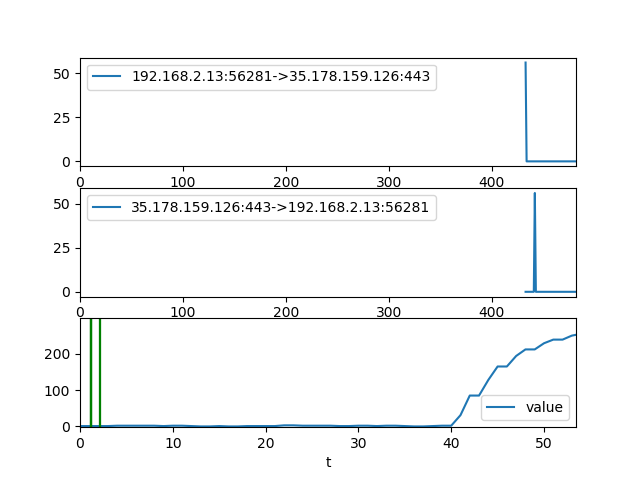

In [74]:


cap_df = pd.read_csv("cap.csv")

#cap_df = cap_df[cap_df.srcport != 5353]
cap_df['t'] = (cap_df['t'] * 1000000).astype("datetime64[us]")
cap_df['flow'] = cap_df.apply(lambda r: f"{r.src}:{r.srcport}->{r.dest}:{r.destport}", axis=1)
cap_df = cap_df.groupby(['t', 'flow']).data_len.sum().unstack().fillna(0).resample('1ms').sum()




fig, ax = plt.subplots(len(cap_df.columns)+1) # Create the figure and axes object

df = cap_df.join(ard_df, how='outer')

#df = df.fillna(0)

df = df.reset_index()
df['t'] = (df['t'] - ard_df.index.values[0]).apply(lambda d: int(d.total_seconds() * 1000))
df = df.set_index('t')


# Plot the first x and y axes:
#df.plot(y = 'value', ax = ax[0]) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
for n, c in enumerate(df.columns):
    df.plot(y = n, ax = ax[n]) 

# This changes the formatter.
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M:%S.%f"))

#ax.get_legend().set_bbox_to_anchor((0.7, 1))

# Redraw the plot.
plt.draw()

for t in win_msgs['t']:
    plt.axvline(x=t, color='green')
    plt.axvline(x=t, color='green')
    plt.axvline(x=t, color='green')